In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
consumer_key = 'LrSxpWHRWjwa2h8R4SQOZJUIV'
consumer_secret_key = '8d3xWVMKm6LpXDIbZW930I5eiH0kb0jhtNr8pvSHkABm63qPh9'
access_token = '1334421915549585408-8HocCnFw9QvWCZLXbei8QL5BrwfFi4'
access_token_secret = 'DePvAq20EWinXLyCi82cfPYIedfAamMMRXet5L40e8XWO'

In [ ]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret_key)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

In [110]:
posts = api.user_timeline(screen_name="UCLdraw", count=1000, lang="en", tweet_mode="extended")

# Print the last 10 tweets
print("Show the 10 recent tweets:\n")
i=1
for tweet in posts[:10]:
  print(str(i) +') '+ tweet.full_text + '\n')
  i= i+1

Show the 10 recent tweets:

1) This is what this season's Round of 16 looks like

#UCLdraw https://t.co/QcUL0z9L7M

2) Are you happy with this year's last #UCLdraw? 

Who's your fav team playing?

3) And finally, @Atalanta_BC will be playing @realmadrid 

#UCLdraw

4) .@SevillaFC will go against @BVB, no way around it 

#UCLdraw

5) Sixth pairing will be @FCBarcelona @PSG_inside

What a match!!!

#UCLdraw

6) Then @FCPorto will be facing @juventusfc

#UCLdraw

7) Halftime for #ucldraw:

@DieRotenBullen will play against @LFC

Great pairings so far, should make for some exciting nights!

8) .@Atleti will be facing @ChelseaFC 

#UCLdraw

9) Second match will be

@OfficialSSLazio vs @FCBayern

#UCLdraw

10) HERE WE GO!

First pairing for the Round of 16 will be
@borussia vs @ManCity 

#UCLdraw



In [111]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
#Show the first 10 rows of data
df.head()

,Tweets
0,This is what this season's Round of 16 looks l...
1,Are you happy with this year's last #UCLdraw? ...
2,"And finally, @Atalanta_BC will be playing @rea..."
3,".@SevillaFC will go against @BVB, no way aroun..."
4,Sixth pairing will be @FCBarcelona @PSG_inside...


In [112]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,This is what this season's Round of 16 looks l...
1,Are you happy with this year's last UCLdraw? \...
2,"And finally, _BC will be playing \n\nUCLdraw"
3,". will go against , no way around it \n\nUCLdraw"
4,Sixth pairing will be _inside\n\nWhat a match...
...,...
186,Fifth draw: Paris Saint Germain ucldraw
187,Real will be playing Dortmund! ucldraw
188,Third draw: Real Madrid ucldraw
189,Barcelona facing Atletico! ucldraw


In [113]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,This is what this season's Round of 16 looks l...,0.400000,-0.2000
1,Are you happy with this year's last UCLdraw? \...,0.533333,0.4000
2,"And finally, _BC will be playing \n\nUCLdraw",1.000000,0.0000
3,". will go against , no way around it \n\nUCLdraw",0.000000,0.0000
4,Sixth pairing will be _inside\n\nWhat a match...,0.000000,0.0000
...,...,...,...
186,Fifth draw: Paris Saint Germain ucldraw,0.000000,0.0000
187,Real will be playing Dortmund! ucldraw,0.300000,0.2500
188,Third draw: Real Madrid ucldraw,0.150000,0.1000
189,Barcelona facing Atletico! ucldraw,0.000000,0.0000


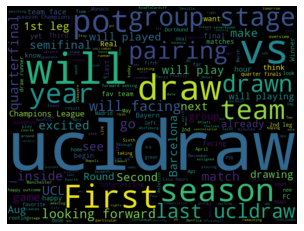

In [114]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=800, height=600, random_state=18, max_font_size=700).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
pip install WordCloud

In [115]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,This is what this season's Round of 16 looks l...,0.400000,-0.2000,Negative
1,Are you happy with this year's last UCLdraw? \...,0.533333,0.4000,Positive
2,"And finally, _BC will be playing \n\nUCLdraw",1.000000,0.0000,Neutral
3,". will go against , no way around it \n\nUCLdraw",0.000000,0.0000,Neutral
4,Sixth pairing will be _inside\n\nWhat a match...,0.000000,0.0000,Neutral
...,...,...,...,...
186,Fifth draw: Paris Saint Germain ucldraw,0.000000,0.0000,Neutral
187,Real will be playing Dortmund! ucldraw,0.300000,0.2500,Positive
188,Third draw: Real Madrid ucldraw,0.150000,0.1000,Positive
189,Barcelona facing Atletico! ucldraw,0.000000,0.0000,Neutral


In [116]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) Are you happy with this year's last UCLdraw? 

Who's your fav team playing?

2) Halftime for ucldraw:

 will play against 

Great pairings so far, should make for some exciting nights!

3) HERE WE GO!

First pairing for the Round of 16 will be
 vs  

UCLdraw

4) Less than 24 hours to go for the next and this year's last UCLdraw.
Are you as excited to see the pairings of the Last 16 as we are?

Who would you like your fav team to get? Let us know!

5) Pot 4 is done, too.

This concludes this season's first UCLdraw

Are you happy with the outcome?
What game are you looking forward to watching in particular?

Let us know! 👍 

6) Pot 4 is done, too.

This concludes this season's first UCLdraw! 

Are you happy with the outcome?
What game are you looking forward to watching in particular?

Let us know! 👍 

7) Pots 1 and 2 drawn

I don't know what game to watch, they're ALL amazing so far! 🤩

ucldraw 

8) Bayern - Atleti should make for an interesting evening!
Cl

In [117]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) This is what this season's Round of 16 looks like

UCLdraw 

2) 📅 Ladies and gentlemen, mark your calendars!

The Round of 16 will be drawn on December 14, 2020.

See you all then! 👋✌️

ucldraw

3) This is what we're dealing with today.
Only a few moments to go...

UCLdraw 

4) This season's UCLdraw for the quarterfinals.
Which game are you especially looking forward to? 

5) WHAT A GAME!
fcbfcb ucldraw

6) Drawing about to begin.
What game would you like to see?
UCLdraw

7) Here are all the pairings of this season's drawing of the round of 16
ucldraw 

8) seventh draw:  (runner-up) vs. _Monaco 
ucldraw

9) sixth draw:  (runner-up) will be playing  
ucldraw

10) fourth draw:  (runner-up) vs.  
UCLdraw

11) Second draw:  (runner-up) vs.  
UCLdraw

12) Gotta hand it to UEFA! Their videos blow your hair back EVERY SINGLE TIME!
ucldraw

13) Round of 16 will be drawn December 15 at noon.
Looking forward to seeing you!
ucldraw

14) Enough monkey business already

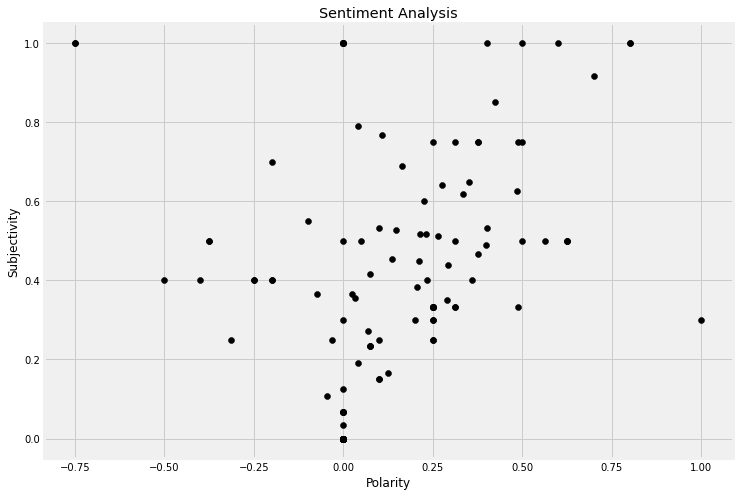

In [118]:
# Plotting 
plt.figure(figsize=(11,8)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='black') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [119]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 1000 , 1)

371.7

In [120]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 1000, 1)

83.8

In [121]:
# Show the value counts
df['Analysis'].value_counts()

Neutral     104
Positive     71
Negative     16
Name: Analysis, dtype: int64

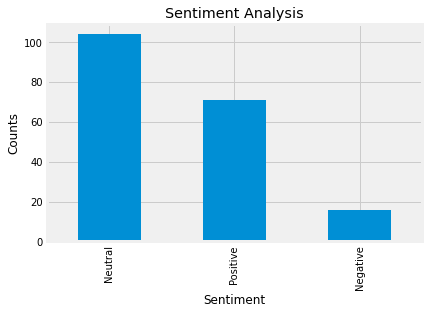

In [122]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

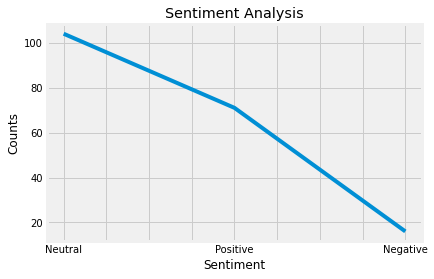

In [123]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'line')
plt.show()